In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing

In [174]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 500)

In [175]:
df = pd.read_csv('main_df.csv')

In [176]:
current_year_df= pd.read_csv('2020_games.csv')

# Feature Engineering

In [177]:
df = df[pd.notnull(df['minutes_played'])]

In [178]:
current_year_df = current_year_df[pd.notnull(current_year_df['minutes_played'])]

In [179]:
name_list = df['name'].unique().tolist()

# Adding average past 3 games columns

**Have to parse dataframe by player and then concat to a new dataframe to ensure when a new player row starts, its not using the data from the player aboves past 3 games**

In [180]:
def rolling_mean(player):
    rolling_df = df[df['name'] == player]
    rolling_df['past_3_games_fantasy'] = rolling_df['fantasy_points'].rolling(3).mean()
    rolling_df['past_3_games_fantasy'] = rolling_df['past_3_games_fantasy'].shift(1)
    rolling_df['past_3_games_points'] = rolling_df['points'].rolling(3).mean()
    rolling_df['past_3_games_points'] = rolling_df['past_3_games_points'].shift(1)
    rolling_df['past_3_games_rebounds'] = rolling_df['total_rebounds'].rolling(3).mean()
    rolling_df['past_3_games_rebounds'] = rolling_df['past_3_games_rebounds'].shift(1)
    rolling_df['past_3_games_assists'] = rolling_df['assists'].rolling(3).mean()
    rolling_df['past_3_games_assists'] = rolling_df['past_3_games_assists'].shift(1)
    rolling_df['past_3_games_steals'] = rolling_df['steals'].rolling(3).mean()
    rolling_df['past_3_games_steals'] = rolling_df['past_3_games_steals'].shift(1)
    #rolling_df['past_3_games_fg%'] = rolling_df['field_goal_perc'].rolling(3).mean()
    #rolling_df['past_3_games_fg%'] = rolling_df['past_3_games_fg%'].shift(1)
    #rolling_df['past_3_games_usage'] = rolling_df['usage_rate'].rolling(3).mean()
    #rolling_df['past_3_games_usage'] = rolling_df['past_3_games_usage'].shift(1)
    #rolling_df['past_3_games_minutes_played'] = rolling_df['minutes_played'].rolling(3).mean()
    #rolling_df['past_3_games_minutes_played'] = rolling_df['past_3_games_minutes_played'].shift(1)
    return rolling_df

In [181]:
def current_rolling_mean(player):
    rolling_df = current_year_df[current_year_df['name'] == player]
    rolling_df['past_3_games_fantasy'] = rolling_df['fantasy_points'].rolling(3).mean()
    rolling_df['past_3_games_fantasy'] = rolling_df['past_3_games_fantasy'].shift(1)
    rolling_df['past_3_games_points'] = rolling_df['points'].rolling(3).mean()
    rolling_df['past_3_games_points'] = rolling_df['past_3_games_points'].shift(1)
    rolling_df['past_3_games_rebounds'] = rolling_df['total_rebounds'].rolling(3).mean()
    rolling_df['past_3_games_rebounds'] = rolling_df['past_3_games_rebounds'].shift(1)
    rolling_df['past_3_games_assists'] = rolling_df['assists'].rolling(3).mean()
    rolling_df['past_3_games_assists'] = rolling_df['past_3_games_assists'].shift(1)
    rolling_df['past_3_games_steals'] = rolling_df['steals'].rolling(3).mean()
    rolling_df['past_3_games_steals'] = rolling_df['past_3_games_steals'].shift(1)
    rolling_df['past_3_games_usage'] = rolling_df['usage_rate'].rolling(3).mean()
    rolling_df['past_3_games_usage'] = rolling_df['past_3_games_usage'].shift(1)
    return rolling_df

**Creating one dataframe**

In [182]:
current_df = pd.DataFrame()
for w in current_names:
    if len(current_rolling_mean(w)) > 15:
        current_df = pd.concat([current_df, current_rolling_mean(w)])

/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [183]:
past_df = pd.DataFrame()
for w in name_list:
    if len(rolling_mean(w)) > 100:
        past_df = pd.concat([past_df, rolling_mean(w)])

/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/drew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

# Making the Dataframe to model with

In [184]:
model_df = past_df.drop(columns = ['slug', 'date', 'age', 'game_result',\
                              'minutes_played', 'field_goals', 'field_goals_att', \
                              'field_goal_perc', 'three_point_made', 'three_point_att',\
                              'three_point_perc', 'free_throws_made', 'free_throws_att',\
                              'free_throw_perc', 'offensive_rebound', 'defensive_rebound',\
                              'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',\
                              'team', 'personal_fouls', 'points', 'game_score', 'plus_minus',\
                              'date_string', 'combined', 'team_field_goals', 'team_free_throws_att',\
                              'team_turnovers', 'team_minutes_played', 'true_shooting_att', 'true_shooting_%', 'usage_rate'])
#                               'wins', 'losses', 'win_pct', 'margin_of_victory', 'offensive_rating', 'defensive_rating',\
#                                 'net_rating', 'adjusted_margin_of_victory', 'adjusted_offensive_ratings', 'adjusted_defensive_ratings',\
#                                   'adjusted_net_rating', 'adjusted_offensive_rating', 'adjusted_defensive_rating'])

In [185]:
model_df.isna().sum()

Unnamed: 0                  0
name                        0
away                        0
opponent                    0
fantasy_points              0
past_3_games_fantasy     1125
past_3_games_points      1125
past_3_games_rebounds    1125
past_3_games_assists     1125
past_3_games_steals      1125
past_3_games_usage       1374
dtype: int64

In [186]:
model_df = pd.get_dummies(model_df, columns=['opponent'])

In [187]:
model_df = model_df.dropna()

In [188]:
current_model_df = current_df.drop(columns = ['slug', 'date', 'age', 'game_result',\
                              'minutes_played', 'field_goals', 'field_goals_att', \
                              'field_goal_perc', 'three_point_made', 'three_point_att',\
                              'three_point_perc', 'free_throws_made', 'free_throws_att',\
                              'free_throw_perc', 'offensive_rebound', 'defensive_rebound',\
                              'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',\
                              'team', 'personal_fouls', 'points', 'game_score', 'plus_minus',\
                              'date_string', 'combined', 'team_field_goals', 'team_free_throws_att',\
                              'team_turnovers', 'team_minutes_played', 'true_shooting_att', 'true_shooting_%', 'usage_rate'])

In [189]:
current_model_df = pd.get_dummies(current_model_df, columns=['opponent'])

In [190]:
current_model_df = current_model_df.dropna()

In [191]:
current_model_df.shape

(4703, 40)

# Linear Regression

**Seeing how it performs on the whole dataframe**

train score is 0.48086208677871234
test score is 0.46945763513073063
[22.56149769 24.89471531 21.63738537 ... 13.252285   12.43286324
 13.33915043]
187625    25.00
187626    12.50
187627    13.50
187628    27.75
187629    21.75
187630     8.25
187632    35.50
187633    46.25
187634     8.00
187635    11.25
187636     5.25
187637    16.25
187638     9.00
187639    12.75
187640    17.00
187641    32.00
187642     3.50
187643    15.25
187644    19.75
187645    35.50
187646    14.00
187647     8.50
187648    11.75
187649    12.00
187650     5.00
187651    13.25
187653     4.50
187654    16.75
187655    10.00
187656    22.50
187657     8.50
187658    18.25
187659    12.00
187660     7.75
187661     5.50
187662    14.00
187663     7.50
187664    24.50
187665    11.75
187666    14.50
187667    13.25
187668    11.00
187669     6.00
187670    27.50
187671     6.75
187672    20.25
187674    20.25
187675    18.50
187676    19.50
187677    22.25
187678    16.25
187679    12.50
187680    17.50
1876

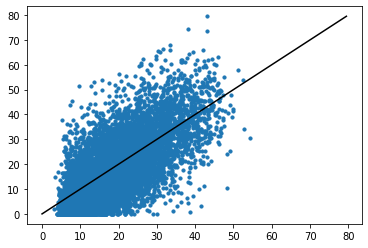

In [839]:
X = model_df.drop(columns = ['fantasy_points', 'fantasy_points_log', 'Unnamed: 0', 'name'] )
#X = testing_df[features]
y = model_df['fantasy_points']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=42, shuffle=False)
lr = LinearRegression()
lr.fit(X_train,y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"train score is {train_score}")
print( f'test score is {test_score}')
print(lr.predict(X_test))
print(y_test)
predictions = lr.predict(X_test)
residuals = y_test - predictions
plt.scatter(predictions, y_test, s=10, alpha = 1)
plt.plot([0, np.max(y_test)],
            [0, np.max(y_test)],
            color = 'black');

**Testing the model by player**

In [235]:
def player_prediction(player): 
    testing_df = model_df[model_df['name'] == player]
    testing_df = testing_df.drop(columns= ['name'])
    #features = ['past_3_games_fantasy', 'past_3_games_points', 'past_3_games_rebounds', 'past_3_games_assists', 'past_3_games_steals', 'past_3_games_usage']
    X = testing_df.drop(columns = ['fantasy_points', 'Unnamed: 0'] )
    #X = testing_df[features]
    y = testing_df['fantasy_points']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.01, random_state=42, shuffle=False)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    predictions = lr.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')
    # Calculate mean absolute percentage error (MAPE)
    ape = 100 * (np.mean(errors) / np.mean(y_test))
    # Calculate and display accuracy
    mape = 100 - np.mean(ape)
    print(predictions)
    print(y_test)
    print(mape)
    residuals = y_test - predictions
    plt.scatter(predictions, y_test, s=10, alpha = 1)
    plt.plot([0, np.max(y_test)],
             [0, np.max(y_test)],
                 color = 'black');

[36.78027344 37.26446533 38.85253906 38.55847168 25.43560791 35.36425781
 35.39154053]
239556    54.25
239557    35.50
239558    29.50
239562    32.50
239563    35.00
239564    26.00
239565    42.25
Name: fantasy_points, dtype: float64
76.30105411305146


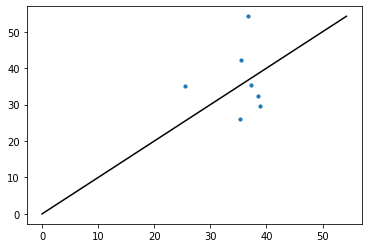

In [236]:
player_prediction('Kemba Walker')

# Random Forest Regressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
model_df.head(200)

,Unnamed: 0,name,away,fantasy_points,past_3_games_fantasy,past_3_games_points,past_3_games_rebounds,past_3_games_assists,past_3_games_steals,past_3_games_usage,opponent_ATL,opponent_BOS,opponent_BRK,opponent_CHA,opponent_CHH,opponent_CHI,opponent_CHO,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOK,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHO,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
3,3,Vince Carter,1,17.50,24.583333,14.000000,3.666667,2.000000,1.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Vince Carter,1,35.25,21.000000,11.000000,4.000000,1.666667,1.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,Vince Carter,0,25.50,28.000000,15.333333,3.333333,1.666667,1.333333,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,6,Vince Carter,0,27.00,26.083333,13.000000,4.333333,1.666667,1.666667,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,Vince Carter,0,55.00,29.250000,15.000000,5.666667,2.333333,1.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,8,Vince Carter,1,14.00,35.833333,18.333333,6.666667,3.333333,1.666667,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,Vince Carter,1,52.50,32.000000,15.666667,6.000000,2.666667,1.333333,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,10,Vince Carter,0,42.50,40.500000,20.666667,6.666667,2.333333,2.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,11,Vince Carter,0,25.00,36.333333,18.666667,6.666667,1.333333,1.000000,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,12,Vince Carter,1,30.75,40.000000,19.000000,8.000000,1.666667,1.000000,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
return_list = []
def player_prediction_plot(player): 
    testing_df = model_df[model_df['name'] == player]
    testing_df = testing_df.drop(columns= ['name'])
    X = np.array(testing_df.drop(columns = ['fantasy_points', 'Unnamed: 0', 'past_3_games_usage'] ))
    y = np.array(testing_df['fantasy_points'])
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.01, random_state=42, shuffle=False)
    # Instantiate model with 250 decision trees
    rf = RandomForestRegressor(n_estimators = 250, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')
    # Calculate mean absolute percentage error (MAPE)
    ape = 100 * (np.mean(errors) / np.mean(y_test))
    # Calculate and display accuracy
    mape = 100 - np.mean(ape)
    return_dict = {'name': player,
                   'mape': mape,
                    'actual': np.mean(y_test)}
    return_list.append(return_dict)
    return return_dict

In [197]:
name_list = model_df['name'].unique().tolist()

In [206]:
for name in name_list:
    player_prediction_plot(name)

In [204]:
plot_df = pd.DataFrame(return_list)

In [207]:
plot_df.head()

,name,mape,actual
0,Steven Adams,67.536436,36.708333
1,Bam Adebayo,84.313758,40.583333
2,LaMarcus Aldridge,54.418100,33.150000
3,Jarrett Allen,76.283916,23.833333
4,Kyle Anderson,73.595166,20.687500


In [242]:
current_return_list = []
def current_player_prediction_plot(player): 
    testing_df = current_model_df[current_model_df['name'] == player]
    testing_df = testing_df.drop(columns= ['name', 'date.1'])
    X = np.array(testing_df.drop(columns = ['fantasy_points', 'past_3_games_usage'] ))
    y = np.array(testing_df['fantasy_points'])
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=False)
    # Instantiate model with 250 decision trees
    rf = RandomForestRegressor(n_estimators = 250, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')
    # Calculate mean absolute percentage error (MAPE)
    ape = 100 * (np.mean(errors) / np.mean(y_test))
    # Calculate and display accuracy
    mape = 100 - np.mean(ape)
    current_return_dict = {'name': player,
                   'mape': mape,
                    'actual': np.mean(y_test)}
    current_return_list.append(current_return_dict)
    return current_return_dict

In [209]:
current_names = current_model_df['name'].unique().tolist()

In [210]:
for name in current_names:
    current_player_prediction_plot(name)

In [223]:
current_plot_df = pd.DataFrame(current_return_list)

In [225]:
current_plot_df.to_csv('2020_plot_df.csv')

In [226]:
plot_df.to_csv('plot_df.csv')

In [270]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [294]:
def player_prediction(player): 
    testing_df = model_df[model_df['name'] == player]
    testing_df = testing_df.drop(columns= ['name'])
    X = np.array(testing_df.drop(columns = ['fantasy_points', 'Unnamed: 0'] ))
    y = np.array(testing_df['fantasy_points'])
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.01, random_state=42, shuffle=False)
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 250, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Calculate mean absolute percentage error (MAPE)
    ape = 100 * (errors / y_test)
    mape = 100 - np.mean(ape)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'MSE is: {round(mse, 2)}')
    print(f'MAE is: {round(mae, 2)}')
    print('MAPE:', round(mape, 2), '%.')
    print(f'Average Actual: {round(np.mean(y_test),2)}')
    print(f'Average Prediction: {round(np.mean(predictions),2)}')
    plt.scatter(predictions, y_test, s=10, alpha = 1)
    plt.plot([0, np.max(y_test)],
        [0, np.max(y_test)],
         color = 'black');

MSE is: 75.64
MAE is: 7.23
MAPE: 83.94 %.
Average Actual: 46.54
Average Prediction: 43.96


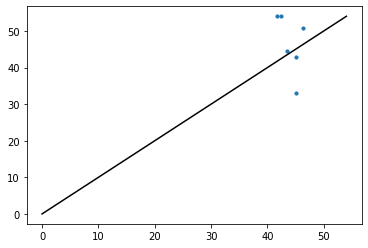

In [295]:
player_prediction('Kawhi Leonard')

In [ ]:
[36.78027344 37.26446533 38.85253906 38.55847168 25.43560791 35.36425781
 35.39154053]
239556    54.25
239557    35.50
239558    29.50
239562    32.50
239563    35.00
239564    26.00
239565    42.25
Name: fantasy_points, dtype: float64
76.30105411305146

Mean Absolute Error: 7.63 points.
Accuracy: 79.69 %.
[40.983 36.659 36.01  41.969 25.595 28.819 31.458]
[54.25 35.5  29.5  32.5  35.   26.   42.25]
36.42857142857143